--- STARTING MILESTONE 1 ---
Dataset Loaded. Shape: (7043, 21)


/tmp/ipython-input-453852556.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


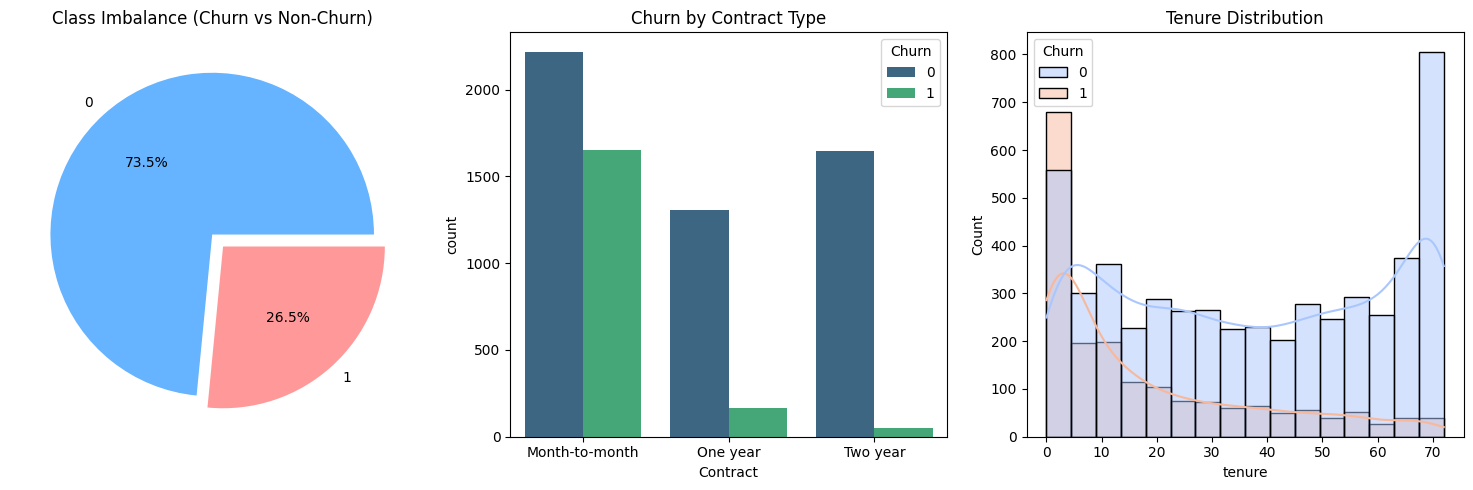

✅ Milestone 1 Deliverables (EDA Plots) Generated.


In [5]:
# ==========================================
# 📦 IMPORT LIBRARIES
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# ==========================================
# 🍀 MILESTONE 1: DATA COLLECTION & EXPLORATION
# ==========================================
print("--- STARTING MILESTONE 1 ---")

# 1. Data Collection
df = pd.read_csv('/content/Telco_Cusomer_Churn.csv')
print(f"Dataset Loaded. Shape: {df.shape}")

# 2. Data Cleaning
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df = df.drop(['customerID'], axis=1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 3. EDA Visualizations (REQUIRED DELIVERABLE)
plt.figure(figsize=(15, 5))

# Plot A: Class Imbalance (Pie Chart)
plt.subplot(1, 3, 1)
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], explode=(0, 0.1))
plt.title('Class Imbalance (Churn vs Non-Churn)')
plt.ylabel('')

# Plot B: Churn by Contract (Bar Chart)
plt.subplot(1, 3, 2)
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Churn by Contract Type')

# Plot C: Numerical Distribution (Tenure)
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, palette='coolwarm')
plt.title('Tenure Distribution')

plt.tight_layout()
plt.show()
print("✅ Milestone 1 Deliverables (EDA Plots) Generated.")

# 4. Preprocessing (Encoding & Splitting)
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Handling Imbalance (SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 6. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)



--- STARTING MILESTONE 2 ---
Model Trained.

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1035
           1       0.55      0.64      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:57:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


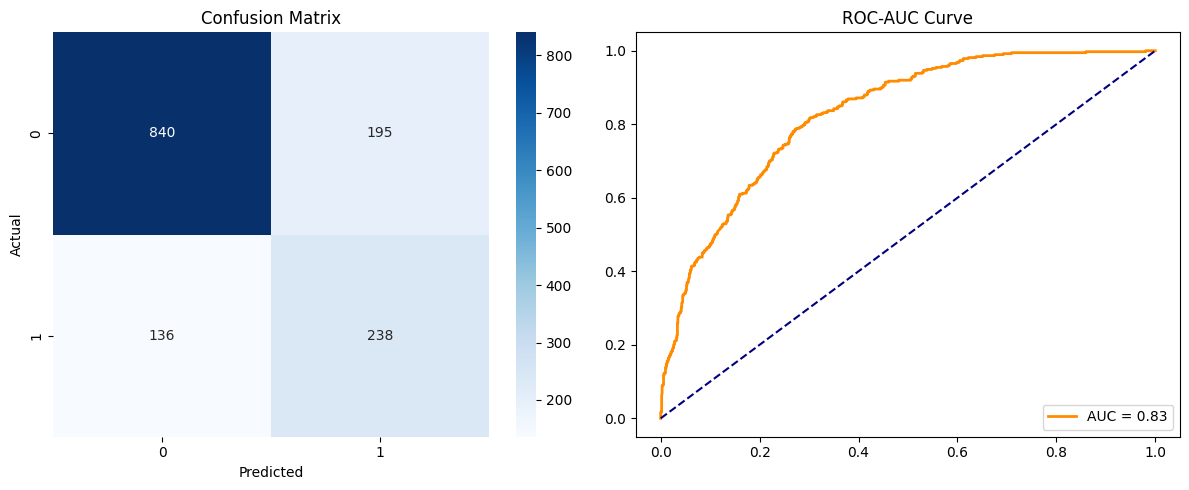

/tmp/ipython-input-2229173891.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='magma')


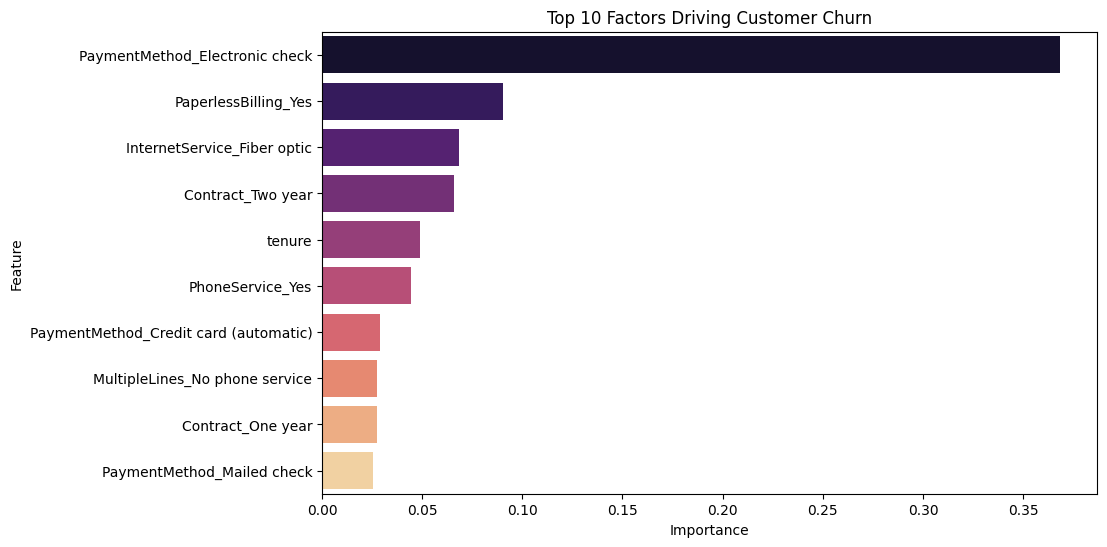

✅ Milestone 2 Deliverables (Evaluation & Interpretation) Generated.


In [6]:
# ==========================================
# 🍀 MILESTONE 2: MODEL DEVELOPMENT & EVALUATION
# ==========================================
print("\n--- STARTING MILESTONE 2 ---")

# 1. Model Selection (XGBoost)
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4, # Depth 4 is a good balance
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 2. Training
model.fit(X_train_scaled, y_train_resampled)
print("Model Trained.")

# 3. Evaluation Metrics (Accuracy, Precision, Recall, F1)
y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 4. Evaluation Visualizations (Confusion Matrix & ROC)
plt.figure(figsize=(12, 5))

# Plot A: Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot B: ROC-AUC Curve
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.title('ROC-AUC Curve')

plt.tight_layout()
plt.show()

# 5. Feature Importance (REQUIRED DELIVERABLE)
# This explains "Why customers churn"
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='magma')
plt.title('Top 10 Factors Driving Customer Churn')
plt.show()
print("✅ Milestone 2 Deliverables (Evaluation & Interpretation) Generated.")

In [7]:
# ==========================================
# 💾 SAVE ARTIFACTS FOR MILESTONE 3
# ==========================================
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("\n--- PREPARATION FOR MILESTONE 3 ---")
print("1. Download 'xgb_model.pkl'")
print("2. Copy these values into your app.py (Use these exact numbers):")
print(f"MEANS = {list(np.round(scaler.mean_, 4))}")
print(f"SCALES = {list(np.round(scaler.scale_, 4))}")
print(f"EXPECTED_COLUMNS = {list(X.columns)}")


--- PREPARATION FOR MILESTONE 3 ---
1. Download 'xgb_model.pkl'
2. Copy these values into your app.py (Use these exact numbers):
MEANS = [np.float64(0.1352), np.float64(28.0401), np.float64(68.2382), np.float64(2088.1978), np.float64(0.5732), np.float64(0.5057), np.float64(0.2911), np.float64(0.9201), np.float64(0.1062), np.float64(0.4888), np.float64(0.5413), np.float64(0.17), np.float64(0.17), np.float64(0.2887), np.float64(0.17), np.float64(0.3763), np.float64(0.17), np.float64(0.3767), np.float64(0.17), np.float64(0.2897), np.float64(0.17), np.float64(0.4553), np.float64(0.17), np.float64(0.451), np.float64(0.1904), np.float64(0.1793), np.float64(0.6942), np.float64(0.2182), np.float64(0.4818), np.float64(0.2358)]
SCALES = [np.float64(0.3419), np.float64(24.0154), np.float64(28.7458), np.float64(2201.9142), np.float64(0.4946), np.float64(0.5), np.float64(0.4543), np.float64(0.2711), np.float64(0.3081), np.float64(0.4999), np.float64(0.4983), np.float64(0.3756), np.float64(0.3756),